In [1]:
# imports and functions, does nothing

from functools import partial
from IPython.display import Image, display, Video, Image, HTML
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils.multiclass import unique_labels
import sys
sys.path.append('../..')
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import pathlib
import random
import sklearn
import random
import matplotlib
matplotlib.rcParams.update({'font.size': 14})


def img(path, width=400):
    rnd = random.randint(0,2e9)
    return f"""<img src="{path}?nocache={rnd}" style="width:{width}px; "></img>"""


In [2]:
data = np.load('quic-100p-338-40-loops-har.npy', allow_pickle=True).item()

Mean length for nofilter is 34.66844615249532.
Mean length for both is 27.132920019969024.


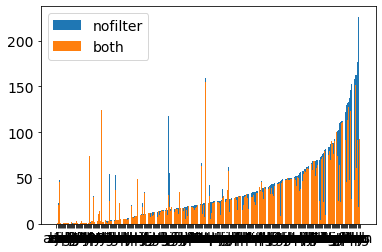

In [3]:
# understand number of subresources

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            lengths_for_this_url.append(len(data[variant][url][sample]))

        lengths.append([url, np.mean(lengths_for_this_url)])

    mean_len = np.mean([x[1] for x in lengths])
    print(f"Mean length for {variant} is {mean_len}.")

    lengths.sort(key=lambda x: x[1])

    xs = [x[0][:3] for x in lengths]
    ys = [x[1] for x in lengths]

    plt.bar(xs, ys, label=variant)

plot('nofilter')
plot('both')
plt.legend()

Mean length for nofilter is 34.66844615249532.


NameError: name 'curve_fit' is not defined

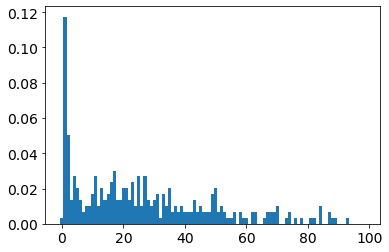

In [4]:
# understand number of subresources

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            lengths_for_this_url.append(len(data[variant][url][sample]))

        lengths.append([url, np.mean(lengths_for_this_url)])

    mean_len = np.mean([x[1] for x in lengths])
    ys = [x[1] for x in lengths]
    print(f"Mean length for {variant} is {mean_len}.")

    bins = np.arange(100) - 0.5
    entries, bin_edges, patches = plt.hist(ys, bins=bins, density=True)
    bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


    def fit_function(k, lamb):
        return poisson.pmf(k, lamb)

    # fit with curve_fit
    parameters, _ = curve_fit(fit_function, bin_middles, entries)

    print("Params", parameters)

    # plot poisson-deviation with fitted parameter
    x_plot = np.arange(0, 100)
    ys2 = poisson.pmf(x_plot, parameters)


    plt.plot(
        x_plot,
        ys2,
        marker='o', linestyle='',
        label='Fit result',
    )


plot('nofilter')
plt.legend()

Mean upstream size for both is 464.44360088788153.


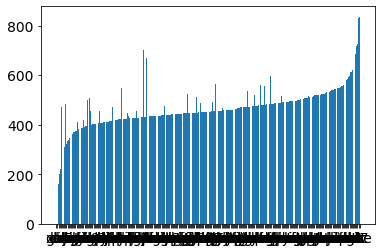

In [ ]:
# understand upstream sizes

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            for subresource in data[variant][url][sample]:
                lengths_for_this_url.append(subresource[1])

        if len(lengths_for_this_url) > 0:
            lengths.append([url, np.mean(lengths_for_this_url)])
        else:
            lengths.append([url,0])

    mean_len = np.mean([x[1] for x in lengths])
    print(f"Mean upstream size for {variant} is {mean_len}.")

    lengths.sort(key=lambda x: x[1])

    xs = [x[0][:3] for x in lengths]
    ys = [x[1] for x in lengths]

    plt.bar(xs, ys, label=variant)

plot('both')

Mean upstream size for both is 464.44360088788153.
NormalDist(mu=464.44360088788153, sigma=85.49024690884458)


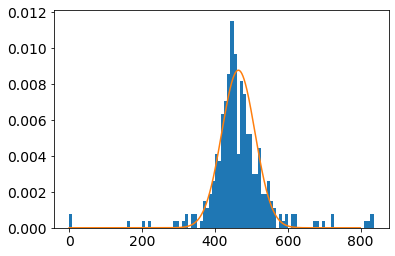

In [ ]:
# understand upstream sizes - fit a gaussian
from statistics import NormalDist
from scipy.stats import norm

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            for subresource in data[variant][url][sample]:
                lengths_for_this_url.append(subresource[1])

        if len(lengths_for_this_url) > 0:
            lengths.append([url, np.mean(lengths_for_this_url)])
        else:
            lengths.append([url,0])

    mean_len = np.mean([x[1] for x in lengths])
    print(f"Mean upstream size for {variant} is {mean_len}.")


    ys = [x[1] for x in lengths]

    _, bins, _ = plt.hist(ys, bins=100, label=variant, density=True)

    n = NormalDist.from_samples(ys)
    print(n)
    import scipy.stats as stats
    x = np.arange(800)
    plt.plot(x, stats.norm.pdf(x, 464.44, 45.49))


plot('both')

Median downstream size for both is 18645.96341409867.


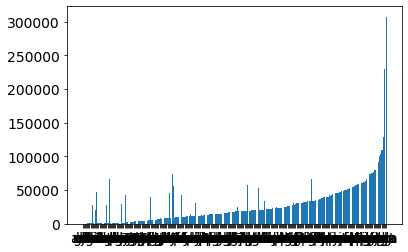

In [ ]:
# understand downstream sizes

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            for subresource in data[variant][url][sample]:
                lengths_for_this_url.append(subresource[2])

        if len(lengths_for_this_url) > 0:
            lengths.append([url, np.mean(lengths_for_this_url)])
        else:
            lengths.append([url,0])

    mean_len = np.median([x[1] for x in lengths])
    print(f"Median downstream size for {variant} is {mean_len}.")

    lengths.sort(key=lambda x: x[1])

    xs = [x[0][:3] for x in lengths]
    ys = [x[1] for x in lengths]

    plt.bar(xs, ys, label=variant)

plot('both')

Mean downstream size for both is 25712.542915401657.


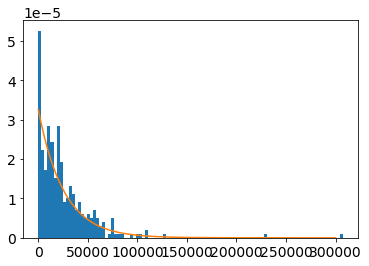

In [ ]:
# understand downstream sizes - fit a gaussian
from statistics import NormalDist
from scipy.stats import norm
import scipy.stats as stats

def plot(variant):
    lengths = []

    for url in data[variant]:

        lengths_for_this_url = []
        for sample in data[variant][url]:
            for subresource in data[variant][url][sample]:
                lengths_for_this_url.append(subresource[2])

        if len(lengths_for_this_url) > 0:
            lengths.append([url, np.mean(lengths_for_this_url)])
        else:
            lengths.append([url,0])

    mean_len = np.mean([x[1] for x in lengths])
    print(f"Mean downstream size for {variant} is {mean_len}.")

    ys = [x[1] for x in lengths]

    _, bins, _ = plt.hist(ys, bins=100, label=variant, density=True)

    xs = np.linspace(1, 300000, 100)
    ys_exp = stats.expon.pdf(xs, 0.0, 153582/6)/1.2
    plt.plot(xs, ys_exp)


plot('both')

Median upstream size for both is 1.24.
Mean upstream size for both is 1.9535666001204355.
Max upstream size for both is 25.832.


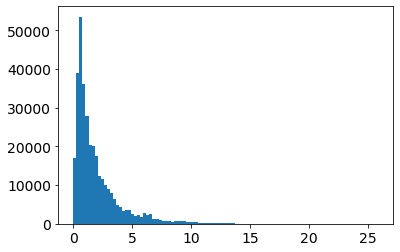

In [ ]:
# understand subresources times

def plot(variant):
    times = []

    for url in data[variant]:
        for sample in data[variant][url]:
            for subresource in data[variant][url][sample]:
                times.append(subresource[0])

    print(f"Median upstream size for {variant} is {np.median(times)}.")
    print(f"Mean upstream size for {variant} is {np.mean(times)}.")
    print(f"Max upstream size for {variant} is {np.max(times)}.")

    plt.hist(times, bins=100)

plot('both')

Median upstream size for both is 1.24.
Mean upstream size for both is 1.9535666001204355.
Max upstream size for both is 25.832.
NormalDist(mu=1.953566600120436, sigma=2.012158691706159)


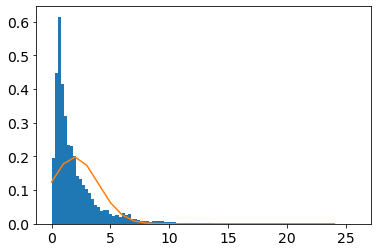

In [ ]:
# Fit curve on times
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import expon
variant = 'both'

times = []
for url in data[variant]:
    for sample in data[variant][url]:
        for subresource in data[variant][url][sample]:
            times.append(subresource[0])

print(f"Median upstream size for {variant} is {np.median(times)}.")
print(f"Mean upstream size for {variant} is {np.mean(times)}.")
print(f"Max upstream size for {variant} is {np.max(times)}.")

# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(times, bins=100, density=True, label='Times')


n = NormalDist.from_samples(times)
print(n)

import scipy.stats as stats
x = np.arange(25)
plt.plot(x, stats.norm.pdf(x, 1.95, 2.01))




Median upstream size for both is 1.24.
Mean upstream size for both is 1.9535666001204355.
Max upstream size for both is 25.832.


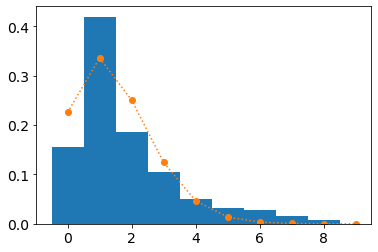

In [ ]:
# Fit curve on times
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
variant = 'both'

times = []
for url in data[variant]:
    for sample in data[variant][url]:
        for subresource in data[variant][url][sample]:
            times.append(subresource[0])

print(f"Median upstream size for {variant} is {np.median(times)}.")
print(f"Mean upstream size for {variant} is {np.mean(times)}.")
print(f"Max upstream size for {variant} is {np.max(times)}.")

xs = np.arange(10)

# the bins should be of integer width, because poisson is an integer distribution
bins = xs - 0.5
entries, bin_edges, patches = plt.hist(times, bins=bins, density=True, label='Times')
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

ys = poisson.pmf(xs, 1.49)

plt.plot(xs,ys,marker='o', linestyle=':')


In [ ]:
# plots one loading

example_trace = []

for url in data[variant]:
    for sample in data[variant][url]:
        example_trace = data[variant][url][sample]
        break
    break

print(example_trace)

[[0.0, 475, 28096], [0.812, 0, -1], [0.843, 442, 1935], [0.844, 909, 3314], [0.845, 596, 12502], [0.847, 594, 3101], [0.848, 585, 68181], [0.849, 591, 2327], [0.85, 571, 33623], [0.851, 579, 5959], [0.853, 583, 2146], [0.855, 585, 1799], [0.856, 579, 13673], [0.857, 611, 2340], [0.879, 587, 21584], [0.88, 588, 28533], [0.881, 584, 20201], [0.882, 590, 23003], [0.883, 590, 7895], [0.884, 587, 13253], [0.885, 594, 39579], [0.886, 578, 15280], [0.89, 589, 15434], [0.891, 576, 21256], [0.892, 580, 67407], [0.893, 584, 8009], [0.894, 595, 3348], [0.909, 578, 2034], [0.94, 581, 47456], [0.941, 570, 4609], [0.942, 575, 2109], [0.943, 569, 2972], [0.944, 564, 2360], [0.948, 577, 2370], [0.949, 572, 6446], [2.958, 587, 456961], [2.961, 520, 17248], [2.962, 524, 17388], [2.963, 685, 78862], [3.261, 523, 18864], [3.351, 597, 10357], [3.352, 0, -1], [4.03, 598, 72403], [4.031, 614, 58261], [4.032, 635, 54042], [4.418, 574, 816], [4.419, 574, 822]]


In [ ]:
distrib_n_objects = lambda: np.random.poisson(lam=28) # not quite right
distrib_time = lambda: np.random.normal(loc=1.95, scale=2.01)
distrib_small_time_after = lambda: np.random.normal(loc=0, scale=0.1)
distrib_upstream_size = lambda: int(np.random.normal(loc=464.44360088788153, scale=85.49024690884458))
distrib_downstream_size = lambda: int(np.random.exponential(scale=153582/6)/1.2)

import random

def sample_not_below(thres=0, fn=None):
    res = fn()
    while res < thres:
        res = fn()
    return res

def defend(trace):
    n_resources = len(trace)
    target_n_resources = sample_not_below(thres=n_resources, fn=distrib_n_objects)
    resources_to_add = target_n_resources - n_resources
    
    queries = [request for request in trace if request[1] > 0] # upstream size is > 0

    while resources_to_add > 0:
        root = random.choice(queries)

        t = root[0]+sample_not_below(thres=0, fn=distrib_small_time_after)

        new_query = [t, distrib_upstream_size(), distrib_downstream_size()]
        print("Chosen root", root, "adding", new_query)

        resources_to_add -= 1

    for request in trace:
        
        t, up, down = request

        if up>0:
            pass
             

defend(example_trace)


Chosen root [0.886, 578, 15280] adding [0.9325376069023071, 374, 3043]
Chosen root [0.851, 579, 5959] adding [0.893496120713817, 368, 70391]
Chosen root [0.884, 587, 13253] adding [0.9047229603015164, 433, 9717]
Chosen root [4.032, 635, 54042] adding [4.314169468521393, 412, 38141]
